In [2]:
from IPython.display import Image

# IMAGE CLASSIFICATION IN DEPTH

## Content

1. Image classification metrics
    1. Binary and multiclass classification
    1. Softmax function
    2. Cross entropy loss function
    3. Confusion matrix
    4. Accuracy, precision recall
    5. Receiver Operating Characteristic (ROC) curve

2. Transfer learning in image classification
    1. Introduction to transfer learning in deep learning
    2. Transfer learning experiment setup
    3. Experiment results and discussion

3. Practical example of image classification in Kaggle

## 1. Image classification metrics

### 1.1 Binary and Multicalss classification

#### Binary

* Binary classification address the case where the label is either "True" or "False"

    * The activation used in binary is the sigmoid function: $\sigma_{sigmoid}(x) = \dfrac {1}{1 + e^{-x}}$ 

    * The sigmoid calculated the independent probabilities

    * Sum of all sigmoid outputs does not necessarily adds up to 1.0

    * A solid decision on a prediction can be found by thresholding the outputs
        * $output = 1$ if $prob > threshold$ else $0$

#### Multicalss

* Multicalss addresses the case with more than 2 classes

    * The activation function used in this case is the Softmax function ($f$)
    * A solid decision on the predicted class is made by taking the class that max the probability
        
        * $output = argmax_{i \in [i...N]}(f_i(x))$

        * The decision would be the class with highest confidence

### 1.2 Softmax function

* A deep learning model at the output layer, outputs classification logits (unnormalized)

* The Softmax function normalizes these logits to a discrete probability distribution by taking the dependent probabilities of the logits

    * $f(z)_i = \dfrac {e^{z_i}} {\sum_{j=1}^N e^{z_j}}$
    * where $z$ is the output logits and $i$ is the class we consider out of $N$ classes

In [3]:
import numpy as np
logits = [0.3, 1.6, 3.1, 5.6]
softmax = lambda z, zs: np.exp(z) / sum(np.exp(zs))
norm_logits = list(map(lambda z: softmax(z, logits), logits))
norm_logits

[0.004515676666643495,
 0.016569357344960955,
 0.07425870771543724,
 0.9046562582729584]

### 1.3 Cross entropy loss function

* Take an input image $x$ (a random variable), true label distribution $P(x)$ and model prediction distribution $Q(x)$

    * The information in a given event quantifies the amount of uncertainty in that event

        * Deterministic events carry very less information (uninformative) (e.g. Sun rose today)
        * Less likely events carries more information (e.g. Today there was an eclips)
        * Information (self) a random variable carries: $I(x) = -log(P(x))$
        * When $log$ is base $e$, the unit of information measurement is nats and bits or shannons for the base $2$

    * The entropy quantifies the uncertainty of a given distribution (expected amount of information)
        * Near deterministic distributions have zero entropy and uniform distributions have very high entropy
        * Entropy (amount of self information) of a distribution: $H(x) = \mathbb E_{x \sim P} [-log(p(x))] = -\sum_{i=0}^{K}[P(x_i)log (P(x_i))]$

    * Taking the same idea, cross entropy measures the difference between a true distribution P(x) and an estimated distribution Q(x)
        * Cross entropy loss: $H(p,q) = -\sum_x P(x)log(Q(x))$
        
    * Cross entropy is always higher than the entropy expected for the case where $Q(x) \approx P(x)$

* Classification example:

    * Take: a model outputs $\sigma(z) = [class 1 = 0.23, class 2 = 0.63, class 3 = 0.14]$ as normalized logits for a given image of $class 2$
    * The onehot encoded lable is $[0, 1, 0]$
    * The cross entropy for this perticular input:
    
        * $H = -0 * log(0.23) - 1 * log(0.63) - 0* log(0.13) = 0.462 $

* Reference on Cross Entropy Loss:
    * http://machinelearningmechanic.com/deep_learning/2019/09/04/cross-entropy-loss-derivative.html
    * https://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/
        


entropy: 2.455934956273793
cross entropy: 4.210934130067198


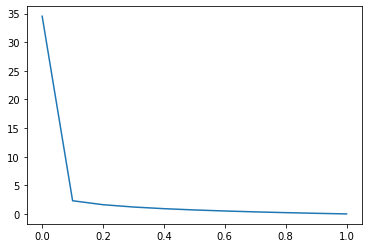

In [4]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
#print(exp)
probs = [1e-15, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
#probs = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
info = [-log(p) for p in probs] ## Information
entropy = -sum([p*log(p) for p in probs]) ## entropy of the distribution
plt.plot(probs, info)
print("entropy: {}".format(entropy))
qprobs = np.abs([prob - 0.15 for prob in probs])
cross_entropy = -sum([p*log(q) for p, q in zip(probs, qprobs)]) ## entropy of the distribution
print("cross entropy: {}".format(cross_entropy))

##### 1.4 Confusion Matrix (CM)

* The CM measures the performance of a classification model (binary or multiclass setup)

* It specifically shows the class confusion by means of True Positive (TP), True Negative (TN), False Positive (FP) and False Negative (FN)s

### Binary case

* TP: The prediction is positive and true (matches the true label)
* TN: The prediction is negative and true 
* FP: The prediction is positive but not true (not the true label)
* FN: The prediction is negative but not true



In [5]:
Image(url= "https://miro.medium.com/max/2400/1*fxiTNIgOyvAombPJx5KGeA.png", width=300, height=300)

In [6]:
from sklearn.metrics import confusion_matrix
y_true = [True, False, False, True, True, False, True, False]
y_pred = [True, True, False, True, False, False, True, False]
confusion_matrix(y_true, y_pred)

array([[3, 1],
       [1, 3]])

#### 1.4 Confusion Matrix (CM)

#### Multiclass case

* Similar to the binary case, the multiclass case considers all the classes when calculating TP, TN, FP and FNs

* Refernce for the example: https://dev.to/overrideveloper/understanding-the-confusion-matrix-264i

* E.g. Take the following confusion matrix:

    <img src="https://res.cloudinary.com/practicaldev/image/fetch/s--cRGF5_MX--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/hri4evvbu1t2v7mmmvct.png" alt="drawing" width="300"/>

#### True Positive 

* The TPs in this case represents the correctly classified samples. They are the once in the diagonal:

    * $TP_{total} = P_{GG} + P_{MM} + P_{SS}$

#### True Negatives

* TNs for each class can be seen as follows,
    * For the grayhound class $TN_{grayhound} = P_{MM} + P_{SM} + P_{MS} + P_{SS}$

    * <img src="https://res.cloudinary.com/practicaldev/image/fetch/s--Ps4NK1D6--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/wn6xmsa03jt6q5uxpyhv.png" alt="drawing" width="300"/>

    * For the mastiff class $TN_{mastiff} = P_{GG} + P_{SG} + P_{GS} + P_{SS}$
    
    * <img src="https://res.cloudinary.com/practicaldev/image/fetch/s--Gt_FzbqX--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/59757aql6m5rnv3b1cqo.png" alt="drawing" width="300"/>

    * For the samoyed class $TN_{samoyed} = P_{GG} + P_{MG} + P_{GM} + P_{MM}$
    
    * <img src="https://res.cloudinary.com/practicaldev/image/fetch/s--qlCarH7U--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/zmli0399jpwjmgrbjgh6.png" alt="drawing" width="300"/>

    * So the total number of true negatives are: $TN_{total} = TN_{grayhound} + TN_{mastiff} + TN_{samoyed}$

#### False Positives

* FPs in multiclass case: The number of samples from other classes that are predicted as the subjected class

    * For the grayhound class $FP_{grayhound} = P_{GM} + P_{GS}$

    * <img src="https://res.cloudinary.com/practicaldev/image/fetch/s--628wJA9p--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/mfd9j7yq5v4i797z3a0e.png" alt="drawing" width="300"/>

    * For the mastiff class $FP_{mastiff} = P_{MG} + P_{MS}$

    * <img src="https://res.cloudinary.com/practicaldev/image/fetch/s--YUU4QJhi--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/nghrfl7wqguyhvk01kag.png" alt="drawing" width="300"/>

    * For the samoyed class $FP_{samoyed} = P_{SG} + P_{SM}$

    * <img src="https://res.cloudinary.com/practicaldev/image/fetch/s--3QUKW-Sp--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/e6gfhvxnh3l532paoju6.png" alt="drawing" width="300"/>

    * So the total number of FPs are: $FP_{total} = FP_{grayhound} + FP_{mastiff} + FP_{samoyed} $

#### False Negatives

* FNs in the multiclass case: The number of samples from a ground truth class that are classified as other classes

    * For the grayhound class $FN_{grayhound} = P_{MG} + P_{SG} $

    * <img src="https://res.cloudinary.com/practicaldev/image/fetch/s--QpG8_xwv--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/x1ufhj99p00c3eynsw2q.png" alt="drawing" width="300"/>

    * For the mastiff class $FN_{mastiff} = P_{GM} + P_{SM} $

    * <img src="https://res.cloudinary.com/practicaldev/image/fetch/s--L_S_v5uG--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/kxb9eu9wa48v1kyknv10.png" alt="drawing" width="300"/>

    * For the mastiff class $FN_{samoyed} = P_{GS} + P_{MS} $

    * <img src="https://res.cloudinary.com/practicaldev/image/fetch/s--zBCKbcHF--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/7tr1hsadrkm6ckrax4ia.png" alt="drawing" width="300"/>

    * The number of total FNs are: $FN_{total} = FN_{grayhound} + FN_{mastiff} + FN_{samoyed} $



    

In [7]:
## Take 9 samples that would belong to one of the 3 classes
y_true = [0, 2, 1, 0, 2, 0, 2, 1, 1]
y_pred = [0, 2, 1, 0, 2, 0, 2, 1, 1]
confusion_matrix(y_true, y_pred)

array([[3, 0, 0],
       [0, 3, 0],
       [0, 0, 3]])

### 1.5 Accuracy, Precision and Recall

#### Accuracy

* The model accuracy simply is the ratio between the total number of correct classifications and total number of classification

    * $Accuracy = \dfrac {TP_{total}} {TOTAL}$ where $TOTAL$ is the total number of classifications
        * In above example $TOTAL = P_{GG} + P_{MG} + P_{SG} + P_{GM} + P_{MM} + P_{SM} + P_{GS} + P_{MS} + P_{SS}$

    * Accuracy shows how often the classifier is correct in prediction

    * However accuracy does not reflect the true capability of a classifier (very sensitive to class imbalances)

#### Precision

* Precision of a given class measures the accuracy of that class given the total number of predictions in that class

    * $Precision = \dfrac {TP} {TP + FP}$

#### Recall

* Recall quantifies the ability of a model to classify the relevent samples in a dataset. This gives an indication on the coverage of a given class

    * $Recall = \dfrac {TP} {TP + FN}$

    * Recall is also known as the sensitive of the model

*Precision and recall can be related to each other inversely*

#### Average of Precision and Recall in multiclass classification

* There are two types of averaging methods:

    * Macro average: $Precision_{macro} = \dfrac {Precision_{total}} {N}$

    * Micro average: $Precision_{micro} = \dfrac {TP_{total}} {TP_{total} + FP_{total}} $

* Ref: https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/#:~:text=Recall%20for%20Multi%2DClass%20Classification&text=binary%20classification%20problems.-,In%20an%20imbalanced%20classification%20problem%20with%20more%20than%20two%20classes,false%20negatives%20across%20all%20classes.

### 1.6 Reciever Characteristic Operator (ROC) curve

* The ROC is originaly an evaluation metric for binary classification 

* ROC is plot of recall against the false positive rate at different thresholds

* It is used to find an optimal threshold that balances the recall and false positive rate

* The area under the ROC curve (AUC) measures the ability of a classifier to distinguish between the classes

* Specificity of a model: How many TN samples got correctly classified out of all negative classifications
    * $Specificity = \dfrac {TN}{TN + FP}$

* False Positve Rate (FPR): rate of negative samples classified as positive
    * $FPR = \dfrac {FP}{FP + TN} = 1 - Specificity$

#### Prediction probability at different thresholds

* Following table shows the measurement metrics for different thresholds
example ref: https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

* <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/data-1.png" alt="drawing" width="300"/>

#### Intepretation of ROC through AOU

* Case-1 $AOU = 1$ gives a model that classifies all the positive and negative classes correctly

    * <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/AUC1.png" alt="drawing" width="100"/>

* Case-2 $AOU = 0$ means all the positive samples classified as negatives and vice versa

* Case-3 $0.5 < AOU < 1$ large portion of TP and TN compared to FP and FNs

    * <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/AUC3.png" alt="drawing" width="100"/>

* Case-4 $AOU = 0.5$ Classifier cannot distinguish the positive and negative classes properly (a random classifier)

    * <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/AUC2.png" alt="drawing" width="100"/>

    * In this case the $Recall = FPR$; The propotion of correct and incorrect classifications are the same

* Finding an optimal threshold means that, finding the point in ROC curve where Recall and Specificity are the highest

#### ROC for multiclass case

* In multiclass case, a one vs all approach can be used:
    * ROC for class-1: Class-1 vs Class-2 and 3

    * ROC for class-2: Class-1 vs Class-1 and 3
    
    * ROC for class-3: Class-1 vs Class-1 and 2

* Keras implementation of binary and multiclass ROC curve calculation: https://github.com/Tony607/ROC-Keras/blob/master/ROC-Keras.ipynb
* Keras classification metrics doc: https://keras.io/api/metrics/classification_metrics/
* Detailed example of ROC: 
    * https://www.youtube.com/watch?v=4jRBRDbJemM&t=2s
    * https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
* On optimal threshold:
    * https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

## 2. Transfer learning in image classification

#### From the paper "How transferable are features in deep neuralnetworks?"

### 2.1 Introduction to transfer learning in deep learning

* In the domain of deep learning, the transfer learning involves a source task (A) and an target task (B)

* The idea is to learn the features using a source task with large enough dataset and transfer the knowledge to the target task by means of learnt parameters

* The transferbility between two tasks could depend on:

    * The distance between tasks (how similar they are)
    * The point of transfer (till which layer the knowledge is transferable)
    * Target dataset size (small dataset could lead to overfitting even in the transfer learning case)

* Once the point of transfer is determined ($N^{th}$ layer), either the transfered features are frozen or fine tuned for the target task

#### Generality and Specificity of a layer

* General features: Features that are common between tasks

* Specific features: Features that are task specific 

* The early layers (near input) of a deep convolutional neural network learns generalizable features such as color blobs, edges and corners

* The later the layer is the generalizability drops and specificity increases (learns high level concepts such as full shapes)

### 2.2 Transfer learning experiment setup

* Two tasks are considered: source task A and target task B

    * Task A has large number of data and Task B has small number of data

* Considered scenarios: 
    
    * Scenario-1: Task A and B are very similar
        
        * Imagenet dataset split according to types of cats and dogs (similar domain)

    * Scenario-2: Task A and B are very different

        * Imagenet dataset split between manmade and natural images (different domains)
    
* A Neural Network with 7 layers is used to train on both the tasks

* Train setup-1: 

    * Train on task B itself and transfer the generalizable feature and train further on the same task

    * Task B training (Fig-2.1)

    * <img src="./presentation_images/Screenshot from 2021-01-11 09-17-55.png" alt="drawing" width="300"/>

    * Transfer from task B to itself for further training (Fig-2.2)

    * <img src="./presentation_images/Screenshot from 2021-01-11 09-18-08.png" alt="drawing" width="300"/>
    
* Train setup-2:

    * Train on the task A (large dataset), transfer the generalizable features to task B and train further

    * Task A training (Fig-2.3)

    * <img src="./presentation_images/Screenshot from 2021-01-11 09-13-51.png" alt="drawing" width="300"/>

    * Transfer from task A to B (Fig-2.4)

    * <img src="./presentation_images/Screenshot from 2021-01-11 09-16-53.png" alt="drawing" width="300"/>



### 2.3 Experiment results and discussion

#### Similar domain case:

* The following plots show the top-1 accuracies for the task B validation set

* <img src="./presentation_images/Screenshot from 2021-01-11 09-29-33.png" alt="drawing" width="300"/>

* White dots: The base accuracy for task B validation is 62.5% when only trained on task B (Fig-2.1)

* Solid blue dot: Freeze the first 3 layers, initialize the rest of the layers randomly (Fig-2.2)
    
    * The results here shows, that for the first 3 layers we have similar accuracies as expected (Because of generalizability)

    * But the drop after layer 4 indicates the co-adaptive features. The co-adaptive features are the features that depends/has a relationship to preceeding layers

    * However, from layer 6-8 the accuracy again recovers indicating these layers are free of co-adaptive features 

* Blue dot with a +: The frozen layers are also further trained along with the randomly initialized layers (Fig-2.2)

    * The performance here is similar to the base accuracy since the scenario itself is similar to the task B only training (the base case)

* Red diamonds: first 3 layers are trasfered from task A to B and frozen (Fig-2.4)

    * Here shows clearly the generalizability between tasks

    * The performance when only the first 3 layers are frozen gives similar accuracies as trained on task B iteself(generalizability)

    * But after the layer 3 the performance drops significantly as the number of co-adaptive and specific features dominates the generalizable features

* Red diamonds with a +: Similar to the previous case, but the transfered features of task A further fine tuned (Fig-2.4)

    * This results suggests that, when fine tuned after transfering from a different domain could lead to better generalization compared to all the method discussed above
    
    * Be aware that depending on the size of the target dataset, there is a potential that this could lead to an overfitting



### 2.3 Experiment results and discussion

#### Different domain case:

* The following results are plotted according the pneumonia classification experiments

    * Both binary classification (pneumonia or normal)
    
    * multi-class classification (pneumonia-bacteria, pneumonia-viral and normal)